In [1]:
from seisflows.tools.config import import_seisflows
import os

a = import_seisflows(workdir=os.getcwd(), parameter_file="parameters.yaml")


2023-12-22 15:16:39 (D) | setting iteration==11 from state file


In [38]:
import os
from seisflows.tools.model import Model
from plot_2d_image import plot_2d_image

true_model = Model(os.path.join("output", "MODEL_TRUE"))
grad_model = Model(os.path.join("output", "GRADIENT_03"))
model1 = Model(os.path.join("output", "MODEL_02"))

no coordinates found for assumed SPECFEM2D model, will not be able to plot figures
no coordinates found for assumed SPECFEM2D model, will not be able to plot figures


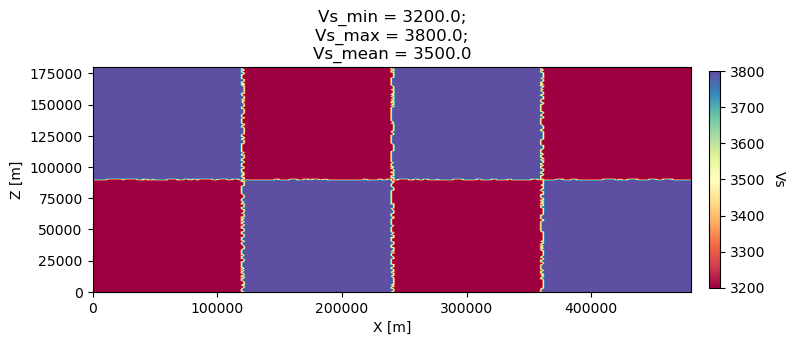

In [37]:
true_model.plot2d("vs")

(4, 10000) (4, 10000)


(<Figure size 936.329x351.123 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fbc3dd58790>)

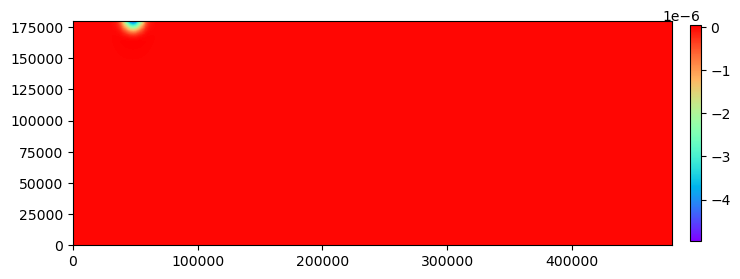

In [39]:
xyz = true_model.coordinates
x, z = xyz['x'], xyz['z']
true_data = grad_model.read()
true_vs = true_data['vs_kernel']
true_vp = true_data['vp_kernel']
print(true_vs.shape, true_vp.shape)
plot_2d_image(x, z, true_vs, cmap='rainbow', zero_midpoint=False, resX=1000, resZ=1000) # cmap = 'viridis'

(4, 10000) (4, 10000)


(<Figure size 936.329x351.123 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fbb8ce4a370>)

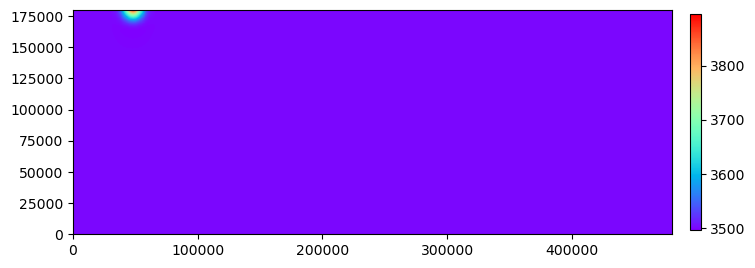

In [40]:
xyz = true_model.coordinates
x, z = xyz['x'], xyz['z']
true_data = model1.read()
true_vs = true_data['vs']
true_vp = true_data['vp']
print(true_vs.shape, true_vp.shape)
plot_2d_image(x, z, true_vs, cmap='rainbow', zero_midpoint=False, resX=1000, resZ=1000) # cmap = 'viridis'

In [26]:
import numpy as np
import pathlib

path_adj = pathlib.Path("scratch", "solver", "mainsolver", 'traces', 'adj')
adjs = sorted(path_adj.glob("*BXX.adj"))

adjs_data = []
for adj in adjs:
    adjs_data.append(np.loadtxt(adj)[:, 1])

adjs_data = np.array(adjs_data)
adjs_data.shape

(40, 5000)

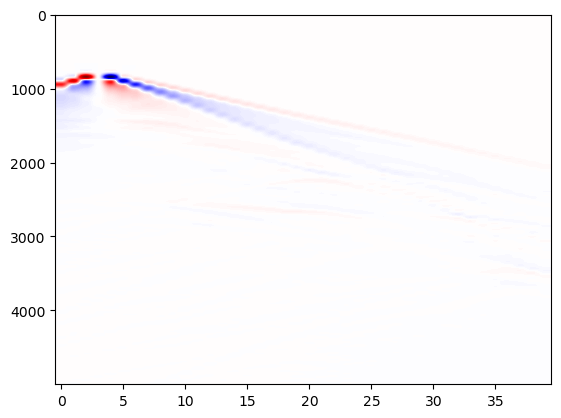

In [27]:
import matplotlib.pyplot as plt

plt.imshow(adjs_data.T, cmap='seismic', aspect='auto')

In [34]:
import numpy as np
import pathlib

path_adj = pathlib.Path("scratch", "solver", "mainsolver", 'traces', 'syn')
syn = sorted(path_adj.glob("*BXX.semd"))

syn_data = []
for adj in syn:
    syn_data.append(np.loadtxt(adj))
syn_data = np.array(syn_data)[..., 1]

syn_data.shape

path_adj = pathlib.Path("scratch", "solver", "mainsolver", 'traces', 'obs')
obs = sorted(path_adj.glob("*BXX.semd"))

obs_data = []
for adj in obs:
    obs_data.append(np.loadtxt(adj))
obs_data = np.array(obs_data)[..., 1]

obs_data.shape

adj_jian = obs_data - syn_data

Text(0.5, 1.0, 'adj')

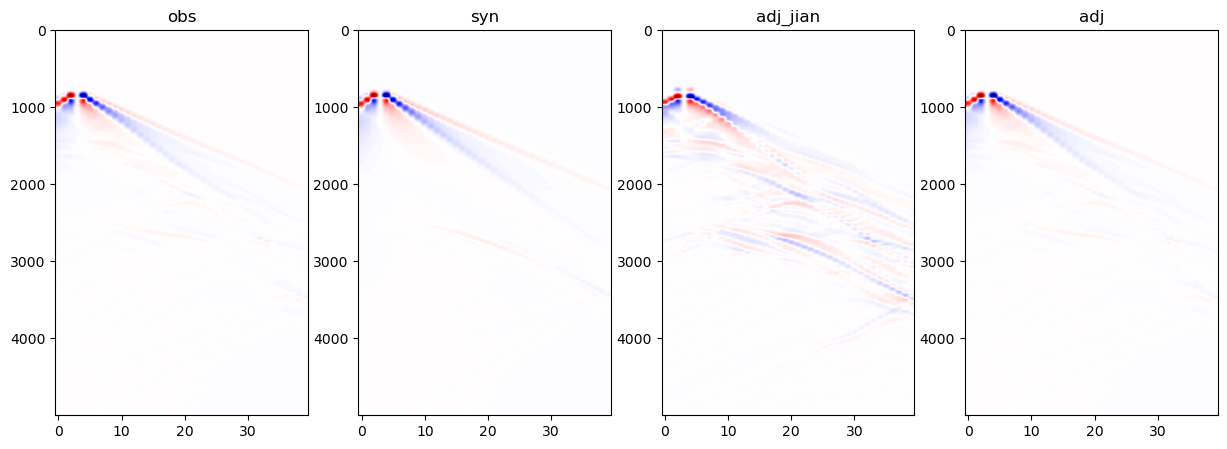

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(obs_data.T, cmap='seismic', aspect='auto')
axes[1].imshow(syn_data.T, cmap='seismic', aspect='auto')
axes[2].imshow(adj_jian.T, cmap='seismic', aspect='auto')
axes[3].imshow(adjs_data.T, cmap='seismic', aspect='auto')

axes[0].set_title("obs")
axes[1].set_title("syn")
axes[2].set_title("adj_jian")
axes[3].set_title("adj")


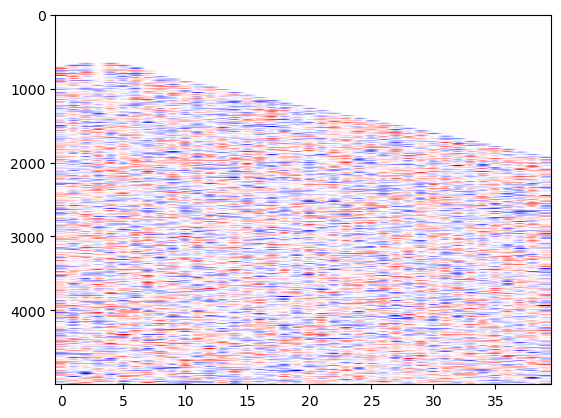

In [29]:
plt.imshow(adjs_data.T - obs_data.T, cmap='seismic', aspect='auto')

In [126]:
path1 = pathlib.Path("scratch", "solver", "mainsolver", 'dispersion_diff.txt')
path2 = pathlib.Path("scratch", "solver", "mainsolver", 'dispersion_diff')

syn_data1 = np.loadtxt(path1, dtype=np.complex128)
obs_data1 = np.loadtxt(path2, dtype=np.complex128)

In [127]:
syn_data1.shape, obs_data1.shape

((2, 121), (2, 121))

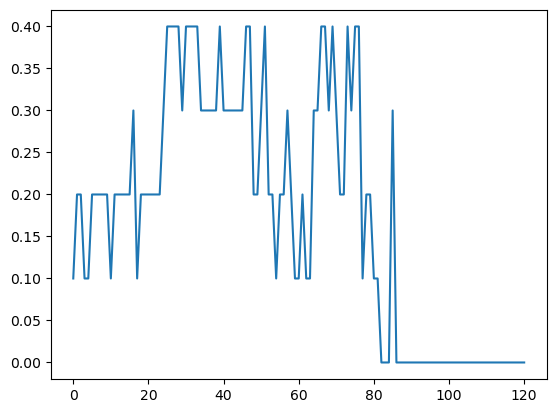

In [130]:
plt.plot(np.abs(syn_data1[0]), label='syn')

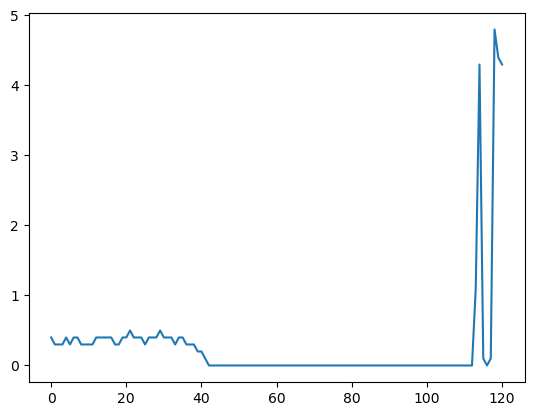

In [132]:
plt.plot(np.abs(obs_data1[1]), label='obs')

In [119]:
syn_data2 = syn_data1[::2, :]

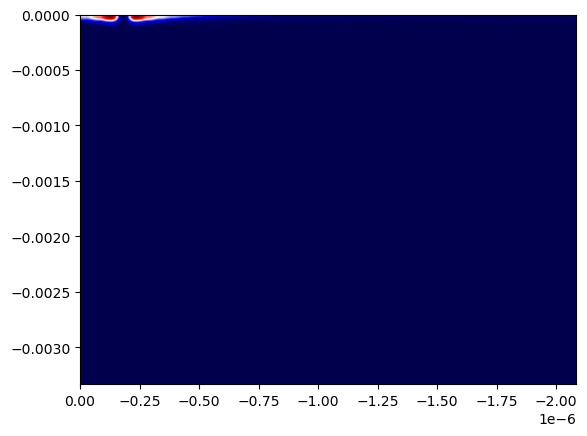

In [121]:
plt.imshow(np.abs(syn_data2).T, cmap='seismic', aspect='auto', extent=[freq_ft_fx[0], freq_ft_fx[-1], freq_ft[-1], freq_ft[0]])

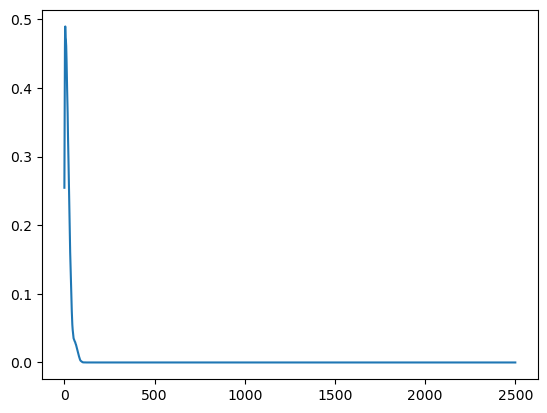

In [120]:
plt.plot(np.abs(syn_data1[1, :]))

In [85]:
syn_data1 - syn_ft[0, :]

array([ 9.81515020e-02+0.00000000e+00j, -1.79142741e-01-5.42734306e-02j,
       -5.34575782e-02+2.84750938e-01j, ...,
       -1.86405925e-06+2.88100102e-09j, -1.86279078e-06+2.13246373e-09j,
       -1.86216796e-06+0.00000000e+00j])

In [115]:
path1 = pathlib.Path("scratch", "solver", "mainsolver", 'syn_data')
path2 = pathlib.Path("scratch", "solver", "mainsolver", 'obs_data')

syn_data1 = np.loadtxt(path1, dtype=np.complex128)
obs_data1 = np.loadtxt(path2, dtype=np.complex128)

In [101]:
syn_data1.shape, syn_data.shape

((80, 5000), (40, 5000))

In [107]:
syn_data2 = syn_data1[1::2, :]

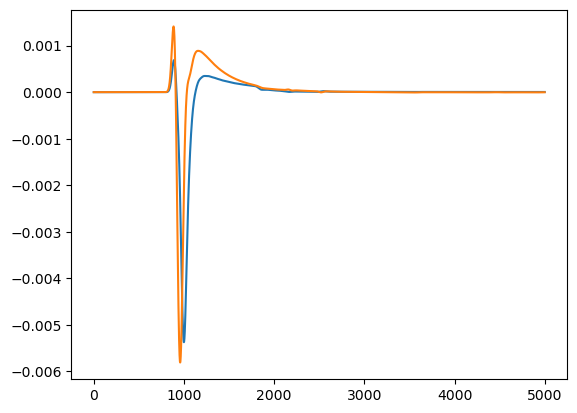

In [113]:
plt.plot(syn_data2[0].real)
plt.plot(-syn_data[0].real)

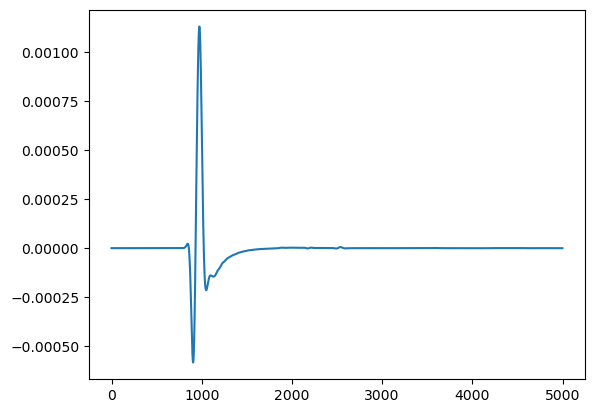

In [106]:
plt.plot(syn_data2[0].real - syn_data[0].real)

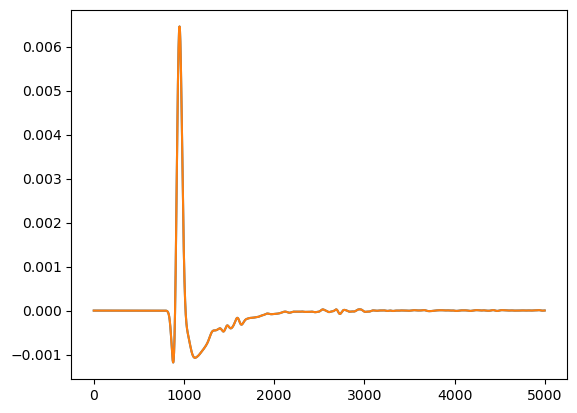

In [116]:
plt.plot(obs_data1[0].real)
plt.plot(obs_data[0].real)

In [151]:
path2 = pathlib.Path("scratch", "eval_grad", 'residuals_001_1_0.txt')

data = np.loadtxt(path2, dtype=np.complex128)

In [152]:
data.shape

(40, 5000)

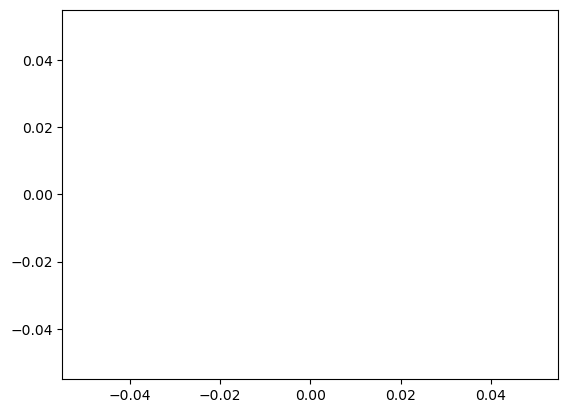

In [149]:
plt.plot(data[0].real)

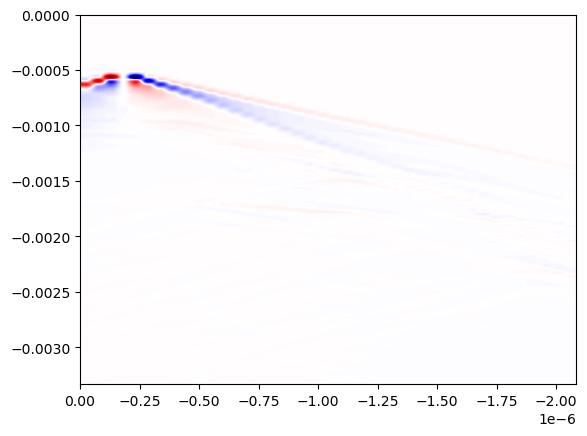

In [146]:
plt.imshow(data.real.T, cmap='seismic', aspect='auto', extent=[freq_ft_fx[0], freq_ft_fx[-1], freq_ft[-1], freq_ft[0]])

In [150]:
data.shape

(10,)

In [139]:
import numpy as np
import pathlib

path_adj = pathlib.Path("scratch", "solver", "mainsolver", 'traces', 'adj')
obs = sorted(path_adj.glob("*BXX.adj"))

obs_data = []
for adj in obs:
    obs_data.append(np.loadtxt(adj))
obs_data = np.array(obs_data)[..., 1]

obs_data.shape


/tmp/ipykernel_1158889/4162549484.py:9: UserWarning: loadtxt: input contained no data: "scratch/solver/mainsolver/traces/adj/AA.S0001.BXX.adj"
  obs_data.append(np.loadtxt(adj))
/tmp/ipykernel_1158889/4162549484.py:9: UserWarning: loadtxt: input contained no data: "scratch/solver/mainsolver/traces/adj/AA.S0020.BXX.adj"
  obs_data.append(np.loadtxt(adj))


IndexError: index 1 is out of bounds for axis 1 with size 0

In [141]:
path = os.path.join("scratch", "solver", "mainsolver")

stations = np.genfromtxt(path+'/DATA/STATIONS',dtype=None)
ntemp = stations.shape
assert ntemp[0]==nx
rx=np.zeros(nx)
rz=np.zeros(nx)
for ix in range(nx):
    rx[ix] = stations[ix][2]
    rz[ix] = stations[ix][3]


/tmp/ipykernel_1158889/1896023054.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  stations = np.genfromtxt(path+'/DATA/STATIONS',dtype=None)


In [142]:
rx

array([ 12000.,  24000.,  36000.,  48000.,  60000.,  72000.,  84000.,
        96000., 108000., 120000., 132000., 144000., 156000., 168000.,
       180000., 192000., 204000., 216000., 228000., 240000., 252000.,
       264000., 276000., 288000., 300000., 312000., 324000., 336000.,
       348000., 360000., 372000., 384000., 396000., 408000., 420000.,
       432000., 444000., 456000., 468000., 480000.])

In [3]:
import numpy as np
import pathlib

path_adj = pathlib.Path("scratch", "solver", "mainsolver", 'traces', 'adj')
obs = sorted(path_adj.glob("*BXX.semd"))

obs_data = []
for adj in obs:
    obs_data.append(np.loadtxt(adj))
obs_data = np.array(obs_data)

obs_data.shape


(40, 5000, 2)

In [2]:
obs

[PosixPath('scratch/solver/mainsolver/traces/adj/AA.S0001.BXX.adj'),
 PosixPath('scratch/solver/mainsolver/traces/adj/AA.S0020.BXX.adj')]

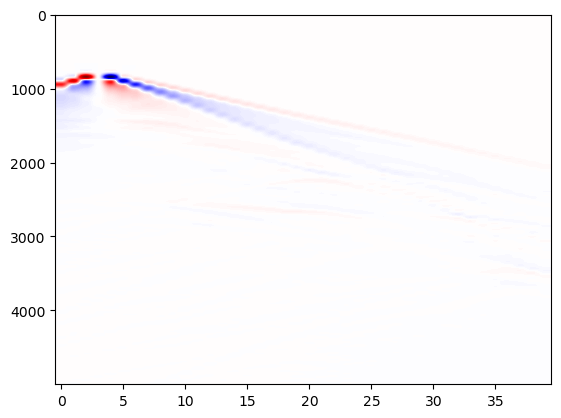

In [5]:
import matplotlib.pyplot as plt
plt.imshow(obs_data[..., 1].T, cmap='seismic', aspect='auto')